In [20]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
file_path = r"C:\Users\leher gangwar\Downloads\noshowappointments-kagglev2-may-2016.csv"
appointments_data = pd.read_csv(file_path)
print(appointments_data.head())


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

Data Cleaning

In [22]:
appointments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [23]:
#checking if any duplicate values
appointments_data.duplicated().any()    

False

In [24]:
#checking for any null values
appointments_data.isnull()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110523,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110524,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110525,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
appointments_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [26]:
# converting some columns that has date to a datetime datatype
appointments_data['ScheduledDay'] = pd.to_datetime(appointments_data['ScheduledDay'])
appointments_data['AppointmentDay'] = pd.to_datetime(appointments_data['AppointmentDay'])

Text(0, 0.5, 'No of Patient')

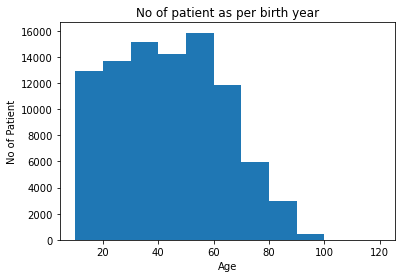

In [27]:
#plotting the histogram to show the relationship between memeber_birth_year and No of Users.
bins = np.arange(10, appointments_data['Age'].max() + 10 , 10)  ##to create edges of a histogram
plt.hist(data = appointments_data, x = 'Age' , bins = bins)
plt.title('No of patient as per birth year')
plt.xlabel('Age')
plt.ylabel('No of Patient')

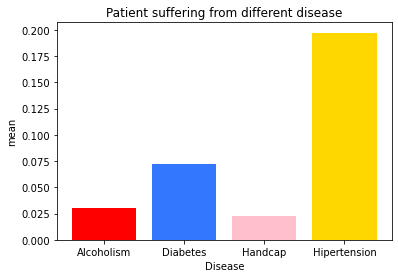

In [28]:
#first let's take out the mean of all the diseases to see the percentage of people with the specific health condition
Alcoholism = appointments_data['Alcoholism'].mean()
Diabetes = appointments_data['Diabetes'].mean()
Handcap = appointments_data['Handcap'].mean()
Hipertension = appointments_data['Hipertension'].mean()

colors = ['red', '#3377ff', 'pink', '#FFD700']
plt.bar(['Alcoholism','Diabetes','Handcap','Hipertension'], [Alcoholism, Diabetes, Handcap, Hipertension], color = colors)
plt.title('Patient suffering from different disease')
plt.xlabel('Disease')
plt.ylabel('mean');

In [29]:
Which gender has the maximum number of patients?

Object `patients` not found.


In [ ]:
Which gender has the maximum number of patients

In [30]:
Which gender has the maximum number of patients

SyntaxError: invalid syntax (Temp/ipykernel_5640/4245953190.py, line 1)

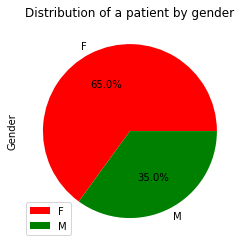

In [13]:
d = appointments_data["Gender"].value_counts()##counts the occurrence of each unique value in "Gender"
colors = ['red', 'green']
d.plot.pie(autopct='%1.1f%%', colors=colors, labels = d.index)  
plt.title("Distribution of a patient by gender")
plt.legend(d.index);  ##adds legend using the index of d (the unique values in 'Gender')

The pie chart clearly shows that female population is most suffering from any disease.

In [14]:
#converting no show data to 0 and 1 instead of 'yes' and 'no' so we can handle using plot 
appointments_data.rename(columns = {'No-show':'No_show'}, inplace = True)  

In [15]:
appointments_data.No_show[appointments_data['No_show'] == 'Yes'] = '1'
appointments_data.No_show[appointments_data['No_show'] == 'No'] = '0'
appointments_data['No_show'] = pd.to_numeric(appointments_data['No_show'])

C:\Users\LEHERG~1\AppData\Local\Temp/ipykernel_5640/919978058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appointments_data.No_show[appointments_data['No_show'] == 'Yes'] = '1'
C:\Users\LEHERG~1\AppData\Local\Temp/ipykernel_5640/919978058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appointments_data.No_show[appointments_data['No_show'] == 'No'] = '0'


In [16]:
# create a mask for people who came
showed = appointments_data['No_show'] == 0
not_showed = appointments_data['No_show'] == 1
appointments_data['showed'] = showed
appointments_data['not_showed'] = not_showed

In [17]:
allP = appointments_data['showed'].value_counts()
print(allP[1] / allP.sum() * 100)

79.8067440534892


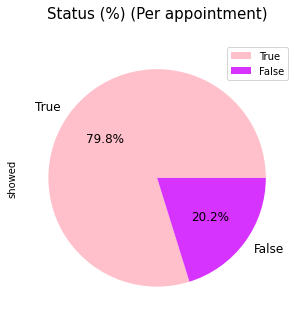

In [18]:
colors1 = ["pink", "#d733ff"]
pieChart = allP.plot.pie(figsize=(5,5), autopct='%1.1f%%', fontsize = 12, colors = colors1);
pieChart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 15);
plt.legend();

Making an histogram to see the realtion between the (age,alcoholic people, SMS recievers, Gender, Scholarship) and the people who came to thier appointment

Alcoholism
0    0.798054
1    0.798512
Name: showed, dtype: float64


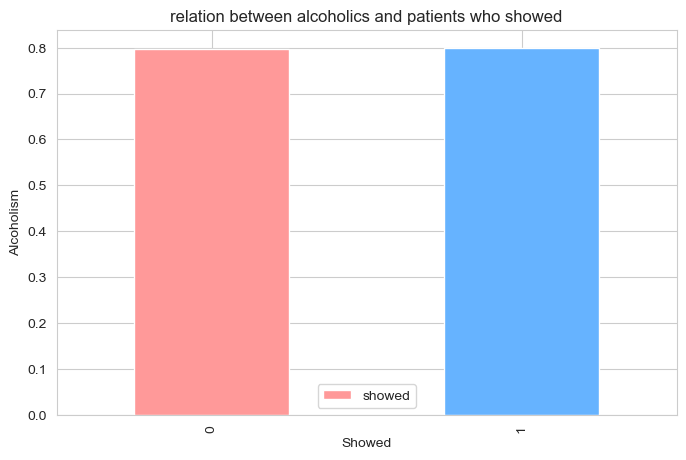

In [209]:
# using group by function to find relations between features
# and then see the relation between alcoholic people and people who showed up and who didn't
print(appointments_data.groupby('Alcoholism')['showed'].mean())
appointments_data.groupby('Alcoholism')['showed'].mean().plot(kind='bar',figsize=(8,5), color=['#ff9999', '#66b3ff']);
plt.xlabel("Showed")
plt.ylabel("Alcoholism")
plt.title("relation between alcoholics and patients who showed")
plt.legend()

SMS_received
0    0.832967
1    0.724255
Name: showed, dtype: float64


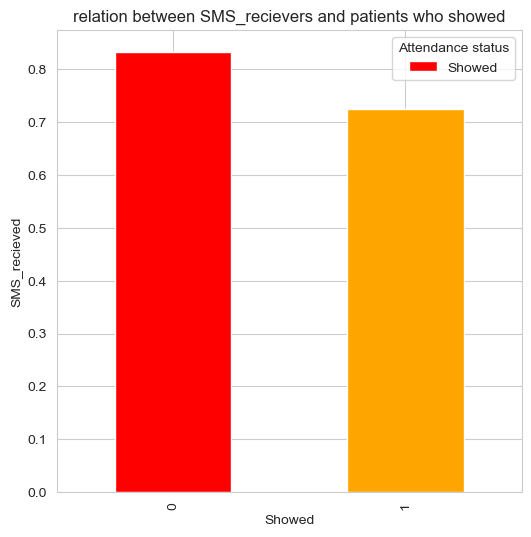

In [237]:
# using group by function to find relations between features
# and then see the relation between sms recievers and people who showed up and who didn't

print(appointments_data.groupby('SMS_received')['showed'].mean())
appointments_data.groupby('SMS_received')['showed'].mean().plot(kind='bar',figsize=(6,6), color = ["red", "orange"]);
plt.xlabel("Showed")
plt.ylabel("SMS_recieved")
plt.title("relation between SMS_recievers and patients who showed")
plt.legend(["Showed"], title='Attendance status', fontsize = 'medium')


Scholarship
0    0.801928
1    0.762637
Name: showed, dtype: float64


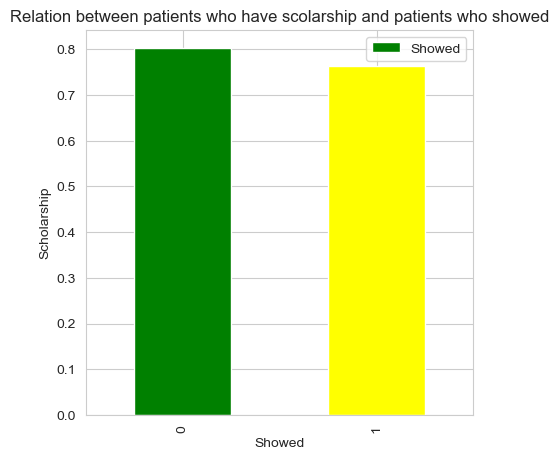

In [243]:
# using group by function to find relations between features
# and then see the relation between people who has scholarship and people who showed up and who didn't

print(appointments_data.groupby('Scholarship')['showed'].mean())
appointments_data.groupby('Scholarship')['showed'].mean().plot(kind = 'bar',figsize=(5,5), color = ['green', 'yellow'])
plt.xlabel("Showed")
plt.ylabel("Scholarship")
plt.title("Relation between patients who have scholarship and patients who showed")
plt.legend(["Showed"])


Limitations: Missing features that could be useful to get more sure what is the most feature that impacts showing to the appointment such as if the patient is employeed or not , or whether the patient have a series medical issue or not. there we some illogical data such as patients with age 0 or less

Conclusions
As we can see sending an SMS for the appiontment is not neccessary the right option to make sure that the patient will come

• As we can see about 22.8% of people that schedule an appointment did not make it to thier appointment

• As we can see most of people who has Scholarship are most likely to miss thier appointments with a percentage of 76.2% of showing and patients who don't have a scholarship have the percentage 80.1%

• The features such as different gender or alcoholic is not a factor to decide if the person would come to his appointment or not!